<a href="https://colab.research.google.com/github/DavoodSZ1993/Dive-into-Deep-Learning-Notes-/blob/main/14_11_fully_convolutional_networks_notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install d2l==1.0.0-alpha1.post0 --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.0/93.0 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.9/84.9 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 69.6 MB/s eta 0:00:00


## 14.11 Fully Convolutional Networks

### Bilinear Interpolation

In [4]:
import numpy as np

A = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9],
              [10, 11, 12]])

print(A)
r, c = A.shape
print()
print('Old dimensions: ', (r, c))
print()

rNew = 2*r - 1
cNew = 2*c - 1
B = np.zeros((rNew, cNew))
print(B)
print()
print('New dimensions: ', (rNew, cNew))
print()

B[0:rNew:2, 0:cNew:2] = A[0:r, 0:c]
print(B)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]

Old dimensions:  (4, 3)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]

New dimensions:  (7, 5)

[[ 1.  0.  2.  0.  3.]
 [ 0.  0.  0.  0.  0.]
 [ 4.  0.  5.  0.  6.]
 [ 0.  0.  0.  0.  0.]
 [ 7.  0.  8.  0.  9.]
 [ 0.  0.  0.  0.  0.]
 [10.  0. 11.  0. 12.]]


In [11]:
from PIL import Image

def resizeImage(name):
  img1 = Image.open(name)

  old = np.asarray(img1) # convert to Numpy array
  rows, cols, layers = old.shape
  new = np.zeros((2*rows-1, 2*cols-1, layers))
  print('original dimensions: ', old.shape)

  for layer in range(3):
    new[:, :, layer] = resizeLayer(old[:, :, layer])

  # Convert the values to unsigned, 8-bit integers
  new = new.astype(np.uint8)
  print('new dimension: ', new.shape)

  img2 = Image.fromarray(new) # Convert back to Image
  newName = 'big-' + name
  img2.save(newName)
  return img2

def resizeLayer(old):
  rows, cols = old.shape

  # move old points
  rNew = 2 * rows - 1
  cNew = 2 * cols - 1
  new = np.zeros((rNew, cNew))
  new[0:rNew:2, 0:cNew:2] = old[0:rows, 0:cols]

  # produce vertical values
  new[1:rNew:2, :] = (new[0:rNew -1:2, :] + new[2:rNew:2, :]) / 2

  # produce horizontal values
  new[:, 1:cNew:2] = (new[:, 0:cNew-1:2] + new[:, 2:cNew:2]) / 2

  # produce center values
  new[1:rNew:2, 1:cNew:2] = (new[0:rNew-2:2, 0:cNew-2:2] +
                             new[0:rNew-2:2, 2:cNew:2] +
                             new[2:rNew:2, 0:cNew-2:2] +
                             new[2:rNew:2, 2:cNew:2]) / 4
  return new

In [7]:
print(A)
test = resizeLayer(A)
print()
print(test)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]

[[ 1.   1.5  2.   2.5  3. ]
 [ 2.5  3.   3.5  4.   4.5]
 [ 4.   4.5  5.   5.5  6. ]
 [ 5.5  6.   6.5  7.   7.5]
 [ 7.   7.5  8.   8.5  9. ]
 [ 8.5  9.   9.5 10.  10.5]
 [10.  10.5 11.  11.5 12. ]]


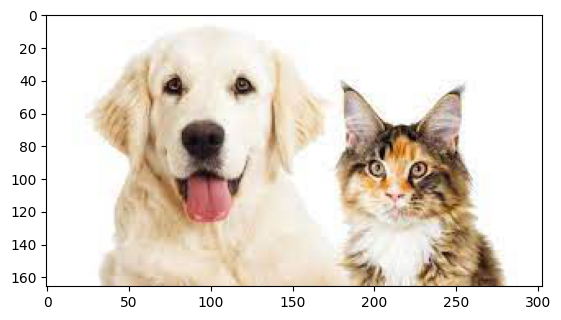

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

img = Image.open('catdog.jpg')
plt.imshow(img)

original dimensions:  (166, 303, 3)
new dimension:  (331, 605, 3)


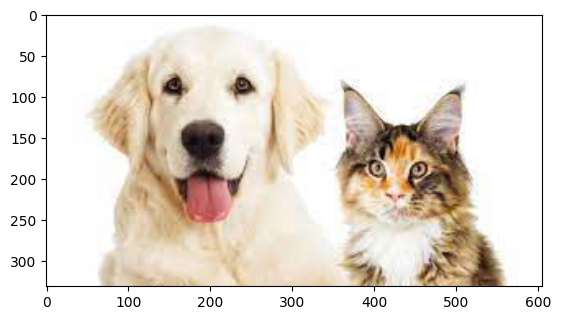

In [13]:
img2 = resizeImage('catdog.jpg')
plt.imshow(img2)